<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/LK99_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

1. Install necessary paxkages
2. Visualize LK99 crystal structure and theoretical XRD pattern
3. Electronic bandstructure



Install packages

In [1]:
!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw jarvis-tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxc9
Suggested packages:
  cython-doc python3-numpy
The following NEW packages will be installed:
  cython3 gpaw-data libxc-dev libxc9 python3-mpi4py
0 upgraded, 5 newly installed, 0 to remove and 15 not upgraded.
Need to get 66.5 MB of archives.
After this operation, 102 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 cython3 amd64 0.29.28-1ubuntu3 [1,336 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 gpaw-data all 0.9.20000-2 [52.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxc9 amd64 5.1.7-1ubuntu1 [3,900 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxc-dev amd64 5.1.7-1ubuntu1 [8,038 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-mpi4py amd64 3.1.3-1build2 [465 kB]
Fetched 66.5 MB in 4s (17.9 

In [3]:
lk99="""bulk@POSCAR-arx-2.vasp
1.0
9.930682382105156 -1.4818366361e-06 0.0
-4.96533990779532 8.60022396073567 -0.0
0.0 0.0 7.4109945172796605
Pb Cu P O
9 1 6 25
direct
0.9986807449642078 0.7699202447216552 0.2474756380877509
0.997701438216252 0.2577003216124319 0.7545056960306785
0.2300797552783452 0.228760500242567 0.2474756380877509
0.7422996783875685 0.7400011176038168 0.7545056960306785
0.7712395147574378 0.0013192690357936 0.2474756380877509
0.2599988973961879 0.0022985757837491 0.7545056960306785
0.3333333129999971 0.6666666269999979 0.0102252768912011
0.3333333129999971 0.6666666269999979 0.4962563424132084
0.6666666870000029 0.3333333429999996 0.5217140548665616
0.6666666870000029 0.3333333429999996 0.063495569971491
0.6238378061607577 0.5940989414527301 0.2330614375419467
0.3715115645822017 0.391385257438064 0.7499251076346213
0.40590105854727 0.0297388347080183 0.2330614375419467
0.6086147425619355 0.9801263371441329 0.7499251076346213
0.970261195291984 0.3761622238392447 0.2330614375419467
0.0198736928558696 0.628488465417801 0.7499251076346213
0.497034195008619 0.641912780728218 0.2504819573050943
0.4722574174374839 0.3124116086150668 0.7489819492636393
0.3580872192717823 0.8551214142804011 0.2504819573050943
0.6875883913849331 0.1598458078224275 0.7489819492636393
0.1448785557195963 0.5029657759913753 0.2504819573050943
0.8401541621775773 0.5277425535625101 0.7489819492636393
0.7465890784344098 0.6974373665162791 0.0877326196589775
0.251871033148696 0.3302579489920529 0.9082269759127742
0.3025626334837207 0.0491516819181211 0.0877326196589775
0.6697420510079468 0.9216131131566275 0.9082269759127742
0.950848347081885 0.2534109515655927 0.0877326196589775
0.0783869158433784 0.7481289968513065 0.9082269759127742
0.2751067320564097 0.36310860261387 0.5737407252403873
0.7132743878686607 0.6201447197159712 0.4140528338576862
0.6368913973861298 0.9119981584425314 0.5737407252403873
0.379855280284029 0.0931296381526946 0.4140528338576862
0.0880018705574747 0.7248932979435926 0.5737407252403873
0.9068703908473114 0.2867256421313418 0.4140528338576862
0.5441603686812513 0.4191736441937305 0.1764358135764958
0.4780900223868556 0.5733419996779769 0.7722935441387523
0.5808263258062671 0.1249867244875282 0.1764358135764958
0.4266579703220141 0.9047479627088743 0.7722935441387523
0.8750132455124694 0.4558396313187486 0.1764358135764958
0.0952520072911234 0.5219099776131445 0.7722935441387523
-0.0 0.0 0.2917658511111268
"""

In [7]:
from jarvis.io.vasp.inputs import Poscar
lk99_atoms = Poscar.from_string(lk99).atoms.ase_converter()

<Axes: >

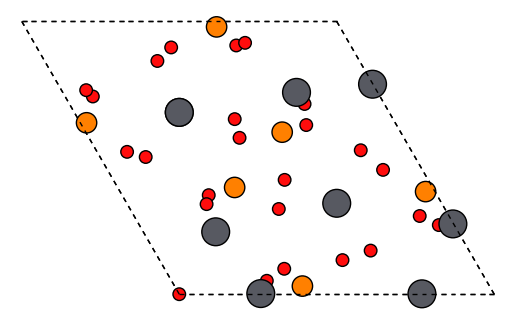

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
fig, ax = plt.subplots()
plt.axis('off')
#plot_atoms(lk99_atoms, ax, radii=0.3, rotation=('90x,45y,0z'))
plot_atoms(lk99_atoms, ax, radii=0.3, rotation=('0x,0y,0z'))

Text(0, 0.5, 'Intensity')

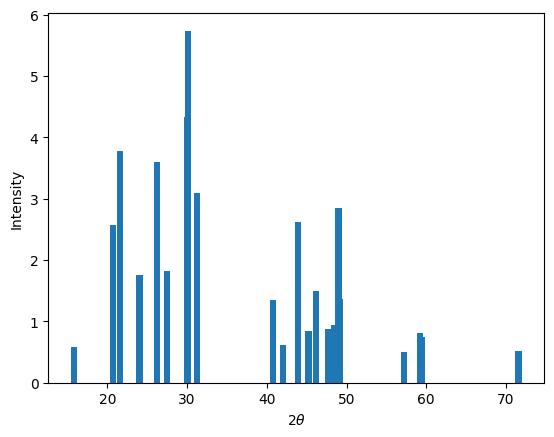

In [52]:
from jarvis.analysis.diffraction.xrd import XRD
from jarvis.core.atoms import ase_to_atoms
theta,d_hkls,intens = XRD().simulate(atoms=ase_to_atoms(lk99_atoms))
plt.bar(theta,intens)
plt.xlabel(r'2$\theta$')
plt.ylabel('Intensity')

In [39]:
%%time
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac

# Perform standard ground state calculation (with plane wave basis)

calc = GPAW(mode=PW(200),
            xc='PBE',
            kpts=(2,2,2),
            random=True,  # random guess (needed if many empty bands required)
            occupations=FermiDirac(0.01),
            txt='lk99_atoms_gs.txt')
lk99_atoms.calc = calc
lk99_atoms.get_potential_energy()
ef = calc.get_fermi_level()
calc.write('lk99_atoms_gs.gpw')

CPU times: user 9min 9s, sys: 2min 23s, total: 11min 33s
Wall time: 9min 33s


In [40]:
print(calc.get_number_of_electrons(),calc.get_number_of_spins(),calc.get_number_of_bands())

317.0 1 195


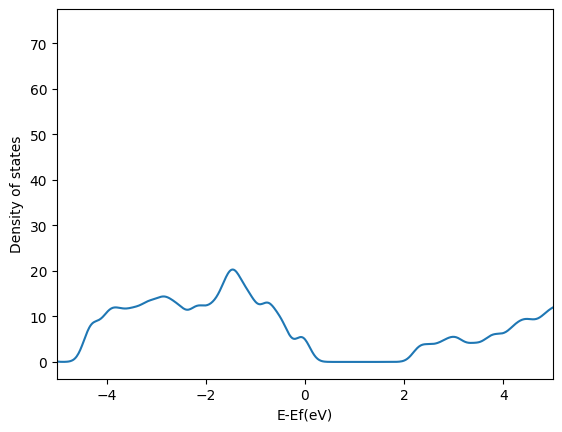

In [54]:
e, dos = calc.get_dos(spin=0, npts=2001, width=0.2)
import matplotlib.pyplot as plt
%matplotlib inline
e_f = calc.get_fermi_level()
plt.plot(e - e_f, dos)
plt.xlabel('E-Ef(eV)')
plt.ylabel('Density of states')
plt.xlim([-5,5])
plt.show()

In [ ]:
# Restart from ground state and fix potential:
calc = GPAW('lk99_atoms_gs.gpw').fixed_density(
    nbands=210,
    symmetry='off',
    kpts={'path': 'GMK', 'npoints': 10},
    convergence={'bands': 160})
%matplotlib inline
bs = calc.band_structure()
bs.plot(filename='bandstructure.png', show=False, emax=10.0)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  23.6.1
 |___|_|             

User:   ???@402c60dccb6c
Date:   Thu Aug  3 01:33:34 2023
Arch:   x86_64
Pid:    452
CWD:    /content
Python: 3.10.12
gpaw:   /usr/local/lib/python3.10/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.10/dist-packages/
        _gpaw.cpython-310-x86_64-linux-gnu.so
ase:    /usr/local/lib/python3.10/dist-packages/ase (version 3.22.1)
numpy:  /usr/local/lib/python3.10/dist-packages/numpy (version 1.22.4)
scipy:  /usr/local/lib/python3.10/dist-packages/scipy (version 1.10.1)
libxc:  5.1.7
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: 160}
  gpts: [35 35 25]
  kpts: {npoints: 10,
         path: GMK}
  mode: {ecut: 200.0,
         name: pw}
  nbands: 210
  occupations: {name: fermi-dirac,
                width: 0.01}
  random: True
  symmetry: off
  xc: PBE

Initialize ...

species:
  Pb:
    name: Lead
    id: 6